<a href="https://colab.research.google.com/github/jung0228/ML/blob/main/%EC%A3%BC%EC%8B%9D%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd 

#해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
#다운로드와 동시에 Pandas에 excel 파일이 load가 되는 구조입니다.
stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
#stock_code.head()

# 데이터에서 정렬이 따로 필요하지는 않지만 테스트겸 Pandas sort_values를 이용하여 정렬을 시도해봅니다.
stock_code.sort_values(['상장일'], ascending=True)

# 필요한 것은 "회사명"과 "종목코드" 이므로 필요없는 column들은 제외
stock_code = stock_code[['회사명', '종목코드']] 

# 한글 컬럼명을 영어로 변경 
stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
#stock_code.head()

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
stock_code.code = stock_code.code.map('{:06d}'.format) 

In [47]:
import requests

# LG화학의 일별 시세 url 가져오기 
company='LG화학' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
page = 1

url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
url = '{url}&page={page}'.format(url=url, page=page)
print(url)
header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  
res = requests.get(url,headers=header)
df = pd.read_html(res.text, header=0)[0]
df.head()

http://finance.naver.com/item/sise_day.nhn?code=051910&page=1


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.01.28,639000.0,29000.0,628000.0,643000.0,622000.0,515989.0
2,2022.01.27,610000.0,54000.0,644000.0,669000.0,605000.0,882032.0
3,2022.01.26,664000.0,21000.0,643000.0,675000.0,643000.0,374033.0
4,2022.01.25,643000.0,28000.0,654000.0,668000.0,630000.0,349700.0


In [48]:
import chardet

In [49]:
company='LG화학' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거

df = pd.DataFrame()
for page in range(1,21):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 '}  
    res = requests.get(url,headers=header)
    df = df.append(pd.read_html(res.text, header=0)[0])

http://finance.naver.com/item/sise_day.nhn?code=051910&page=1
http://finance.naver.com/item/sise_day.nhn?code=051910&page=2
http://finance.naver.com/item/sise_day.nhn?code=051910&page=3
http://finance.naver.com/item/sise_day.nhn?code=051910&page=4
http://finance.naver.com/item/sise_day.nhn?code=051910&page=5
http://finance.naver.com/item/sise_day.nhn?code=051910&page=6
http://finance.naver.com/item/sise_day.nhn?code=051910&page=7
http://finance.naver.com/item/sise_day.nhn?code=051910&page=8
http://finance.naver.com/item/sise_day.nhn?code=051910&page=9
http://finance.naver.com/item/sise_day.nhn?code=051910&page=10
http://finance.naver.com/item/sise_day.nhn?code=051910&page=11
http://finance.naver.com/item/sise_day.nhn?code=051910&page=12
http://finance.naver.com/item/sise_day.nhn?code=051910&page=13
http://finance.naver.com/item/sise_day.nhn?code=051910&page=14
http://finance.naver.com/item/sise_day.nhn?code=051910&page=15
http://finance.naver.com/item/sise_day.nhn?code=051910&page=16
h

In [50]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.01.28,639000.0,29000.0,628000.0,643000.0,622000.0,515989.0
2,2022.01.27,610000.0,54000.0,644000.0,669000.0,605000.0,882032.0
3,2022.01.26,664000.0,21000.0,643000.0,675000.0,643000.0,374033.0
4,2022.01.25,643000.0,28000.0,654000.0,668000.0,630000.0,349700.0
...,...,...,...,...,...,...,...
10,2021.04.16,897000.0,6000.0,897000.0,910000.0,891000.0,271425.0
11,2021.04.15,891000.0,6000.0,898000.0,898000.0,881000.0,299044.0
12,2021.04.14,897000.0,29000.0,892000.0,899000.0,871000.0,555279.0
13,2021.04.13,868000.0,51000.0,825000.0,875000.0,822000.0,713786.0


In [51]:
# df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 

# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

# 일자(date)를 기준으로 오름차순 정렬 
df = df.sort_values(by=['date'], ascending=True) 

# 상위 5개 데이터 확인 
df[10:20]

,date,close,diff,open,high,low,volume
13,2021-04-27,891000,8000,891000,903000,886000,404010
12,2021-04-28,890000,1000,890000,895000,873000,341070
11,2021-04-29,951000,61000,915000,965000,913000,1405704
10,2021-04-30,932000,19000,950000,950000,918000,657252
9,2021-05-03,907000,25000,935000,935000,899000,344795
5,2021-05-04,920000,13000,905000,927000,895000,297052
4,2021-05-06,938000,18000,915000,939000,911000,330040
3,2021-05-07,919000,19000,938000,941000,919000,221711
2,2021-05-10,912000,7000,930000,931000,908000,214715
1,2021-05-11,911000,1000,912000,922000,905000,327452


In [52]:
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px

# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

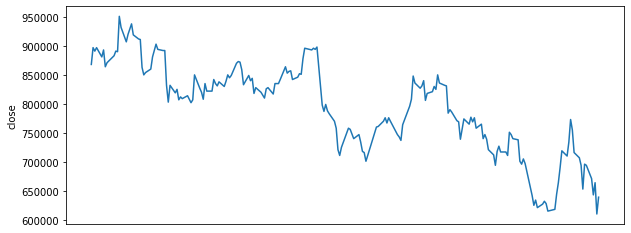

In [53]:
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('')
plt.ylabel('close')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig(company + ".png")
plt.show()

In [54]:
fig = px.line(df, x='date', y='close', title='{}의 종가(close) Time Series'.format(company))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()